In [1]:
__file__ = 'rad_zu_ord_fit.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP2_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const

In [2]:
with open('Data/Data.csv', mode='r') as tf:
    data = np.genfromtxt(tf,delimiter="\t",skip_header=1).T

In [3]:
slope = ufloat(41.7201052,0.17065753)
intercept = ufloat(-1.25029763,0.16276203)

In [4]:
print(6*slope+intercept)

249.1+/-1.0


In [5]:
dat1 = []
mag1 = []
dat2 = []
mag2 = []
amp1 = []
amp2 = []


for i in range(len(data[0])):
    if i%2 == 0:
        dat1.append(data[3][i])
        amp1.append(ufloat(data[4][i],0.01))
    elif i%2 != 0:
        dat2.append(data[3][i])
        amp2.append(ufloat(data[4][i],0.01))

  
        
for i in range(len(amp1)):
    amp1[i] = (amp1[i]*slope+intercept)
    amp2[i] = (amp2[i]*slope+intercept)



In [6]:
mask = 11
fillerr = np.full(len(dat1),1)
res1 = f.linear_fit(dat1[0:mask],up.nominal_values(amp1)[0:mask],fillerr[0:mask])
res2 = f.linear_fit(dat2[0:mask],up.nominal_values(amp2)[0:mask],fillerr[0:mask])

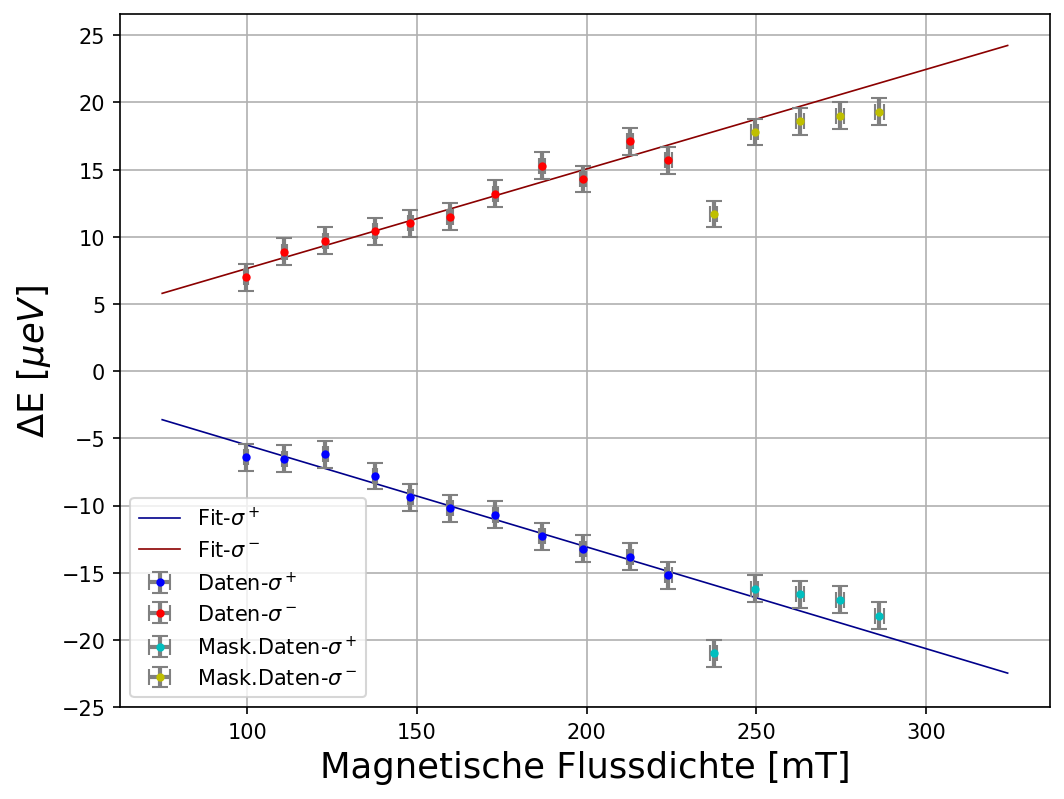

In [7]:
fig = plt.figure(figsize=(8,6),dpi=150,linewidth=30)

plt.plot(np.arange(75,325,1),res1.eval(x=np.arange(75,325,1)),linewidth=0.8,color='darkblue',linestyle='-',alpha=1,label="Fit-$\sigma^+$")
plt.plot(np.arange(75,325,1),res2.eval(x=np.arange(75,325,1)),linewidth=0.8,color='darkred',linestyle='-',alpha=1,label="Fit-$\sigma^-$")


plt.errorbar(up.nominal_values(amp1)[0:mask],dat1[0:mask],xerr=up.std_devs(amp1)[0:mask],yerr = fillerr[0:mask],fmt='b.',ecolor='gray', elinewidth=2, capsize=4,label = 'Daten-$\sigma^+$')
plt.errorbar(up.nominal_values(amp2)[0:mask],dat2[0:mask],xerr=up.std_devs(amp2)[0:mask],yerr = fillerr[0:mask],fmt='r.',ecolor='gray', elinewidth=2, capsize=4,label = 'Daten-$\sigma^-$')

plt.errorbar(up.nominal_values(amp1)[mask:-1],dat1[mask:-1],xerr=up.std_devs(amp1)[mask:-1],yerr = fillerr[mask:-1],fmt='.c',ecolor='gray', elinewidth=2, capsize=4,label="Mask.Daten-$\sigma^+$")
plt.errorbar(up.nominal_values(amp2)[mask:-1],dat2[mask:-1],xerr=up.std_devs(amp2)[mask:-1],yerr = fillerr[mask:-1],fmt='.y',ecolor='gray', elinewidth=2, capsize=4,label="Mask.Daten-$\sigma^-$")



plt.yticks(np.arange(-25,30,5))
plt.ylabel('$\Delta$E [$\mu eV$]',fontsize = 17)
plt.xlabel('Magnetische Flussdichte [mT]',fontsize = 17)
plt.grid()
plt.legend(fontsize = 10)
plt.savefig('Res/borsch_mag.pdf')

In [8]:
print(res1.fit_report())


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 11
    # variables        = 2
    chi-square         = 2.73204887
    reduced chi-square = 0.30356099
    Akaike info crit   = -11.3212779
    Bayesian info crit = -10.5254873
    R-squared          = 0.97324859
[[Variables]]
    slope:     -0.07574549 +/- 0.00418598 (5.53%) (init = -0.07574549)
    intercept:  2.06943308 +/- 0.69566834 (33.62%) (init = 2.069433)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.971


In [9]:
print(res2.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 11
    # variables        = 2
    chi-square         = 5.53630711
    reduced chi-square = 0.61514523
    Akaike info crit   = -3.55224338
    Bayesian info crit = -2.75645284
    R-squared          = 0.94498304
[[Variables]]
    slope:      0.07408799 +/- 0.00595886 (8.04%) (init = 0.07408799)
    intercept:  0.23442195 +/- 0.99030285 (422.44%) (init = 0.2344219)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.971


In [10]:
a1 = ufloat(res1.params['slope'].value,res1.params['slope'].stderr)*-1
a2 = ufloat(res2.params['slope'].value,res2.params['slope'].stderr)
b1 = ufloat(res1.params['intercept'].value,res1.params['intercept'].stderr)
b2 = ufloat(res2.params['intercept'].value,res2.params['intercept'].stderr)

m = ((a1+a2)/2)*1000
print(m.format(":1.5"))
abw = (1-(57.9/m))*100
print(abw.format(":1.5"))

74.917+/-3.641
22.714+/-3.756


In [11]:
emlit = 1.759e11
em=ufloat(2.28e11,0.11e11)
print((1-(emlit/em))*100)

23+/-4
